<a href="https://colab.research.google.com/github/albertoakel/Atividades_EBAC/blob/master/notebook/Revis%C3%A3o_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisão estatistica
A equação da distribuição normal (também conhecida como distribuição gaussiana) é uma distribuição de probabilidade  definida por:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2}$

Onde:

$μ$  média da distribuição; \
$\sigma$ é o desvio padrão; \
$x$ é a variável aleatória;

Algumas caracteristicas;
Média $=$ Mediana($M_{d}$) ( ou quase isso)





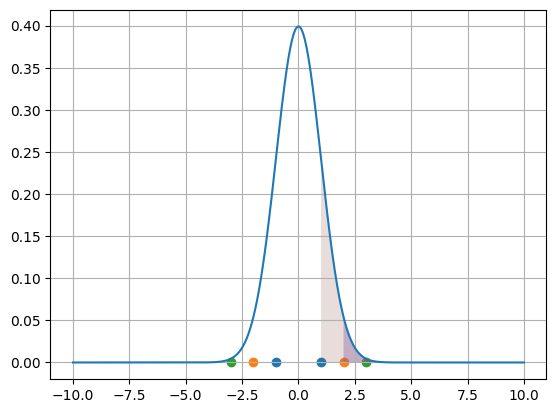

In [56]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy import integrate

from IPython.display import display, Math


x = np.linspace(-10, 10, 1000)
mu=0
sig=1.0
k=1/(sig*np.sqrt(2*ma.pi))
y=k*np.exp(-0.5*((x-mu)/sig)**2)
plt.plot(x,y)
y=[0,0]
x1=[mu+sig,mu-sig]
x2=[mu+2*sig,mu-2*sig]
x3=[mu+3*sig,mu-3*sig]

x05=[0 +0.5]
plt.scatter(x1,y)
plt.scatter(x2,y)
plt.scatter(x3,y)


xo1=np.linspace(x1[0],10,1000)
k=1/(sig*np.sqrt(2*ma.pi))
y1=k*np.exp(-0.5*((xo1-mu)/sig)**2)

xo2=np.linspace(x2[0],10,1000)
k=1/(sig*np.sqrt(2*ma.pi))
y2=k*np.exp(-0.5*((xo2-mu)/sig)**2)

xo3=np.linspace(x3[0],10,1000)
k=1/(sig*np.sqrt(2*ma.pi))
y3=k*np.exp(-0.5*((xo3-mu)/sig)**2)

plt.fill_between(xo3,y3,alpha=0.8)

plt.fill_between(xo2,y2,alpha=0.4)

plt.fill_between(xo1,y1,alpha=0.2)

a=np.arange(-1, 1.5, 0.5)

plt.grid(True)

### Calculando as probabilidades


P1(mu+-1sig) = 0.317
P2(mu+-2sig) = 0.091
P3(mu+-3sig) = 0.005
P5 = 0.309


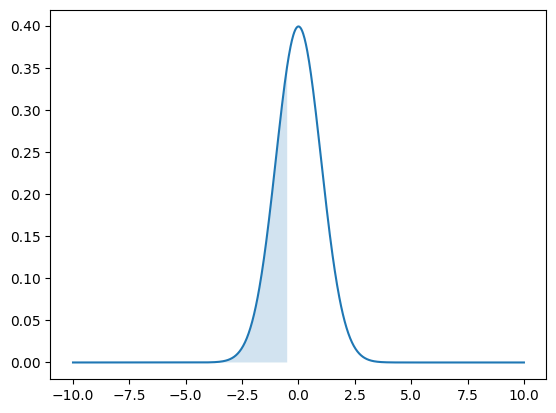

In [118]:
p1=integrate.simpson(y1,x=xo1);
p2=integrate.simpson(y2,x=xo2);
p3=integrate.simpson(y3,x=xo3);
#multiplicar o valor por 2
print(f"P1(mu+-1sig) = {2*p1:.3f}")
print(f"P2(mu+-2sig) = {2*p2 * 2:.3f}")
print(f"P3(mu+-3sig) = {2*p3 * 2:.3f}")

####

x = np.linspace(-10, 10, 1000)
mu=0
sig=1
k=1/(sig*np.sqrt(2*ma.pi))
y=k*np.exp(-0.5*((x-mu)/sig)**2)
plt.plot(x,y)


sig=1

mu=0
xo=np.linspace(-10,-0.5,1000000)
k=1/(sig*np.sqrt(2*ma.pi))
y5=k*np.exp(-0.5*((xo-mu)/sig)**2)
p5=integrate.simpson(y5,x=xo);
print(f"P5 = {p5:.3f}")
#plt.plot(xo,y5)
plt.fill_between(xo,y5,alpha=0.2)


In [121]:
from scipy.stats import norm

media_amostra = 12.6
mu0 = 12
sigma = 2
n = 10
# Estatística Z
z = (media_amostra - mu0) / (sigma / (n**0.5))

# Valor-p (bicaudal)
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Estatística Z: {z:.2f}")
print(f"Valor-p: {p_value:.4f}")

Estatística Z: 0.95
Valor-p: 0.3428


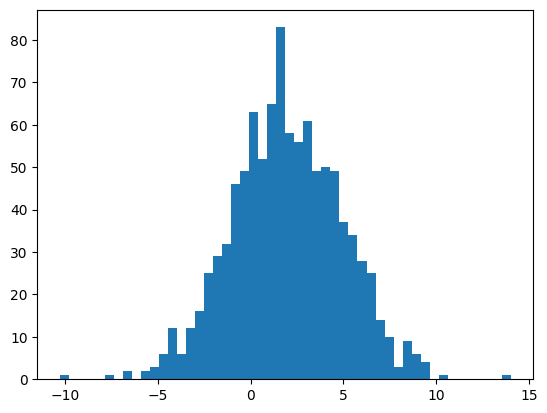

In [ ]:
data = np.random.normal(2,3, size=1000)
plt.hist(data, bins=50)
plt.show()

Média (População): 0.020, Desvio Padrão (População): 1.975, Mediana (População): 0.005
Média (Amostraa): -0.091, Desvio Padrão (Amostra): 1.974,  Mediana (Amostra): -0.347


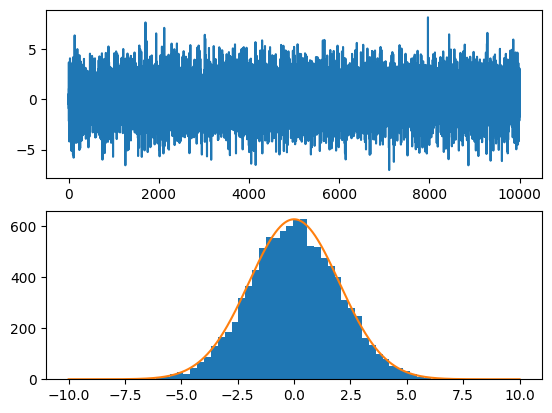

In [10]:
mu=0
sig=2
population = np.random.normal(0, sig, size=10000);
sample = np.random.choice(population, size=100, replace=False)

print(f"Média (População): {np.mean(population):.3f}, \
Desvio Padrão (População): {np.std(population):.3f}, \
Mediana (População): {np.median(population):.3f}")

print(f"Média (Amostraa): {np.mean(sample):.3f},\
 Desvio Padrão (Amostra): {np.std(sample):.3f}, \
 Mediana (Amostra): {np.median(sample):.3f}")
#plt.plot(population)
plt.subplot(2,1,1)
plt.plot(population)
plt.subplot(2,1,2)

yo, xo, _ =plt.hist(population, bins=50);
#y= plt.hist(population)
x = np.linspace(-10, 10, 10000)

k=1/(sig*np.sqrt(2*ma.pi))
A=max(yo)
y=k*np.exp(-0.5*((x-mu)/sig)**2)
ynorm=y/max(y)*A


plt.plot(x,ynorm);


### **Teste de Hipótese**
### 1. Problema
Suponha que você tenha uma amostra de notas de alunos em uma prova e queira testar se a média das notas é significativamente diferente de 7.0 (um valor de referência).

#### 2. Hipótese
*   hipótese nula ($H_{o}$): A média das notas é **igual** a 7.0 \
$H_{o}: \mu=7.0$
*   hipótese alternativa ($H_{1}$): A média das notas é **diferente** de 7.0 \
$H_{o}: \mu\neq7.0$

#### 3. Dados
supondo a seguinte coleção de notas:\
notas=[6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6, 7.3]

#### 4. Método
Como n, total de elementos da coleção é baixo, podemos usar o método t-student. Assim definimos a seguinte equação para t:

$$t=\frac{( \bar{x}-\mu_o)\sqrt{\nu}}{s}$$

onde:\
$\bar{x}$ é a média da amostra \
$\mu_o$ é o valor de referência \
$s$ é o desvio da amostra \
$\nu$ graus de liberdada, $\nu=n-1$
###
**passos ** \
calculando a média, desvio podemos calcular o valor de t, assim: \
$\bar{x}$ = 7.0 \
$s$ = 0.316 \
Finalmente: $t = 0$

**Determinação do valor-p** \
O valor-p mede a probabilidade de obter os resultados observados, assumindo que a hipótese nula é verdadeira. Ele varia de 0 a 1.Em um teste de hipóteses, você formula uma hipótese nula que representa uma afirmação a ser testada – onde os grupos comparados não tem diferença entre si –, e uma hipótese alternativa – que é a afirmação oposta. Indica a probabilidade de obter os resultados observados, assumindo que a hipótese nula seja verdadeira.

* Se o valor-p for menor que o nível de significância (geralmente $\alpha$ =0,05), rejeitamos $H_o$
* Caso contrário, não rejeitamos $H_o$

O valor-P depende do teste de hipótese proposto.

1.   Teste bicaudal: $H_1:\mu \neq \mu_{o}$ \
      $$valor_p=2P(T>|t|)$$
2.   Teste unicaudal à direita $H_1:\mu > \mu_{o}$
$$valor_p=P(T>t)$$
3.   Teste unicaudal à direita $H_1:\mu < \mu_{o}$
$$valor_p=2P(T<t)$$














In [14]:
# Valor de referência
valor_referencia = 7.0
notas = [6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6, 7.3]
# Realizar o teste t para uma amostra
resultado = stats.ttest_1samp(notas, valor_referencia)

# Exibir o resultado
print("Estatística t:", resultado.statistic)
print("Valor-p:", resultado.pvalue)
resultado

Estatística t: 0.0
Valor-p: 1.0


TtestResult(statistic=0.0, pvalue=1.0, df=9)

P5 = 0.309


0.31731050786291415

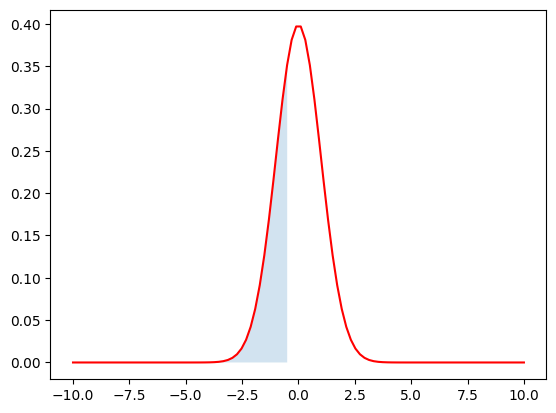

In [141]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(1, 1)
x = np.linspace(-10,10, 100)
y=norm.pdf(x)
plt.plot(x,y,'r-')


sig=1

mu=0
xo=np.linspace(-10,-0.5,1000000)
y5=norm.pdf(xo)
p_valeu=1-norm.cdf(0)
p5=integrate.simpson(y5,x=xo);
print(f"P5 = {p5:.3f}")
#plt.plot(xo,y5)
plt.fill_between(xo,y5,alpha=0.2)
p_valeu=1-norm.cdf(1)
2*p_valeu

In [140]:
import numpy as np

# Função PDF da distribuição normal padrão
def pdf_normal(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2)

# Função para calcular a integral usando a regra de Simpson
def simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("O número de subintervalos (n) deve ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)

    integral = (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])
    return integral

# Função para calcular a CDF da distribuição normal padrão
def cdf_normal(z, n=1000):
    if z < 0:
        return 0.5 - simpson(pdf_normal, z, 0, n)
    else:
        return 0.5 + simpson(pdf_normal, 0, z, n)

# Exemplo de uso
z = 1-0.95  # Valor de Z para calcular a CDF
cdf_z = cdf_normal(z)
print(f"P(Z <= {z}) = {cdf_z:.4f}")

P(Z <= 0.050000000000000044) = 0.5199
